In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('Student_Marks.csv')
print(data.head())
print('*******SHAPE***************')
print(data.shape)

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299
*******SHAPE***************
(100, 3)


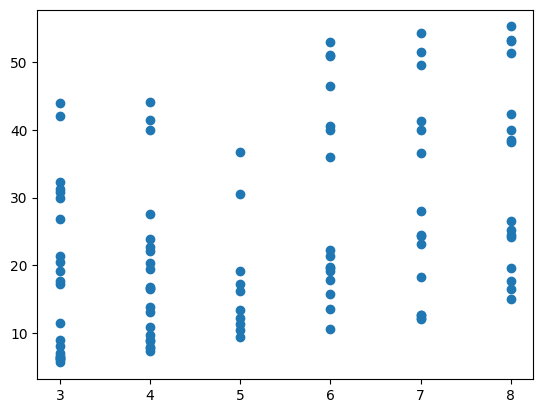

In [3]:
plt.scatter(data['number_courses'],data['Marks'])

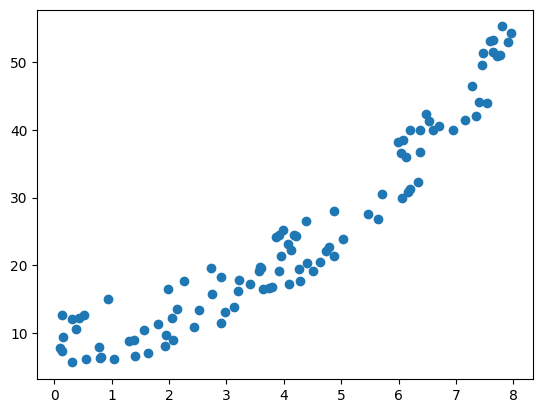

In [4]:
plt.scatter(data['time_study'],data['Marks'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<h1>1) splite the dataset to feature data and target</h1>

<h4>the independent fetsure " X " is time_study , <br>the dependent fetsure or regretion value " Y " is Marks </h4>

In [6]:
mydata=data["time_study"]
target=data["Marks"]


<h1>2) Split to train and test</h2>

In [7]:
from sklearn.model_selection import train_test_split
trainx,testx ,trainy,testy =train_test_split(mydata,target,test_size=0.20,random_state=0)
print('trainx shape is ' , trainx.shape)
print('testx shape is ' , testx.shape)
print('trainy shape is ' , trainy.shape)
print('testy shape is ' , testy.shape)

trainx shape is  (80,)
testx shape is  (20,)
trainy shape is  (80,)
testy shape is  (20,)


<h1>3) we will sort all train and test data to compare it</h1>

In [8]:
trainx.sort_index(inplace=True)
trainy.sort_index(inplace=True)
testx.sort_index(inplace=True)
testy.sort_index(inplace=True)
print(trainx.head(5))
print(trainy.head())

0    4.508
1    0.096
3    7.909
4    7.811
5    3.211
Name: time_study, dtype: float64
0    19.202
1     7.734
3    53.018
4    55.299
5    17.822
Name: Marks, dtype: float64


<h1>4) Convert the independent single fetsure to 2dimention array </h1>

In [9]:
trainx_matrix = trainx.values.reshape(-1,1)
print(trainx_matrix.shape)
testx_matrix = testx.values.reshape(-1,1)
print(testx_matrix.shape)

(80, 1)
(20, 1)


<h1>5) Fit the data in Linear regresion model</h1>

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(trainx_matrix,trainy)

LinearRegression()

<h1>6) Work in test data to compare the actual value and my resalt of prediction</h1>

In [12]:
mypredict=reg.predict(testx_matrix)
Compare=pd.DataFrame(data=mypredict.round(2),columns=['mypredict']) 
Compare['actual']=testy
Compare.head(20)



,mypredict,actual
0,19.29,NaN
1,20.86,NaN
2,26.44,13.811
3,25.68,NaN
4,33.78,NaN
5,13.22,NaN
6,22.10,NaN
7,4.57,17.264
8,23.38,20.348
9,38.69,NaN


<h1>7) Score , coef , intercept</h1>

In [13]:
print( reg.score(trainx_matrix,trainy))
print( reg.coef_)
print( reg.intercept_)

0.8909221202467754
[5.60530698]
1.7245626843387853


In [14]:
type(mypredict)

numpy.ndarray

<h1>Graph </h1>

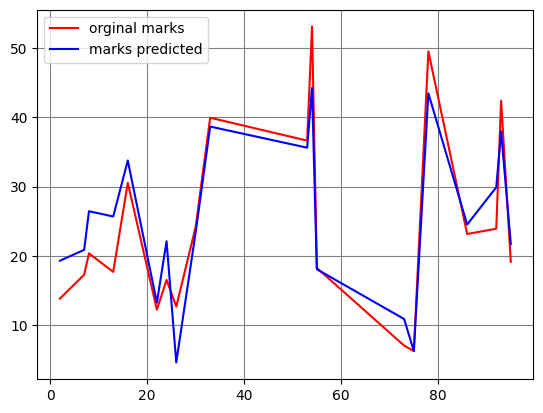

In [15]:
plt.plot(testy.index,testy.values,label='orginal marks',color='red')
plt.plot(testy.index,mypredict,color='blue',label='marks predicted')
plt.legend()
plt.grid(visible=True,color='gray')
plt.show()